In [49]:
#import libs
import os, glob
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, timedelta
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter("ignore")

In [50]:
DATA_PATH = '../data/processed/KPI_processed.parquet'
df = pd.read_parquet(DATA_PATH)
df.head(1)

,Time,eNodeB Name,Cell Name,EPM_RRC_SR,EPM_UL_Traffic_GB,EPM_ERAB_DR,EPM_ERAB_SR,EPM_DL_Traffic_GB,EPM_CSFB_Preparation_SR,EPM_CSFB_SR,...,TE Availabity Daily,EPM_Dropped_Sessions,L.Cell.Unavail.Dur.Manual(s),L.Cell.Unavail.Dur.Sys(s),L.Cell.Avail.Dur(s),EPM_RRC_Failures,EPM_ERABSR_Failures,EPM_Total_Sessions,EPM_ERABSR_Attempts,EPM_RRC_Attempts
0,2022-01-01,LSINS26110_Site_6110,LSINS26110-1,100.0,0.6307,0.0,99.947,0.9672,100.0,100.0,...,100.0,0,0,0,3600,0,1,1903,1888,1879


In [51]:
df['Day']=df['Time'].dt.day
df['Hour']=df['Time'].dt.hour
df['Month'] = df['Time'].dt.month
df.head(1)

,Time,eNodeB Name,Cell Name,EPM_RRC_SR,EPM_UL_Traffic_GB,EPM_ERAB_DR,EPM_ERAB_SR,EPM_DL_Traffic_GB,EPM_CSFB_Preparation_SR,EPM_CSFB_SR,...,L.Cell.Unavail.Dur.Sys(s),L.Cell.Avail.Dur(s),EPM_RRC_Failures,EPM_ERABSR_Failures,EPM_Total_Sessions,EPM_ERABSR_Attempts,EPM_RRC_Attempts,Day,Hour,Month
0,2022-01-01,LSINS26110_Site_6110,LSINS26110-1,100.0,0.6307,0.0,99.947,0.9672,100.0,100.0,...,0,3600,0,1,1903,1888,1879,1,0,1


In [55]:
df_one_hour = df[(df['Month']==1)&(df['Day']==8)&(df['Hour']==0)]
df_one_hour.index = df_one_hour['Cell Name']
X = df_one_hour[['EPM_RRC_SR', 'EPM_UL_Traffic_GB', 'EPM_ERAB_SR','EPM_DL_Traffic_GB','EPM_CSFB_Preparation_SR','EPM_CSFB_SR']]
X.head(1)

,EPM_RRC_SR,EPM_UL_Traffic_GB,EPM_ERAB_SR,EPM_DL_Traffic_GB,EPM_CSFB_Preparation_SR,EPM_CSFB_SR
Cell Name,,,,,,
LSINS26110-1,100.0,0.0299,100.0,0.3263,100.0,100.0


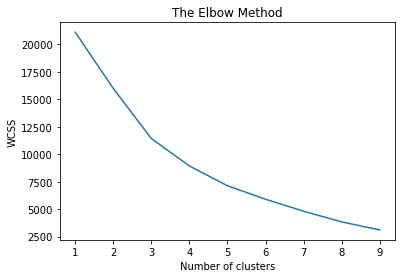

In [56]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [57]:
kmeans = KMeans(n_clusters =3 , init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [58]:
X['cluster']=y_kmeans
X.head(1)

,EPM_RRC_SR,EPM_UL_Traffic_GB,EPM_ERAB_SR,EPM_DL_Traffic_GB,EPM_CSFB_Preparation_SR,EPM_CSFB_SR,cluster
Cell Name,,,,,,,
LSINS26110-1,100.0,0.0299,100.0,0.3263,100.0,100.0,2


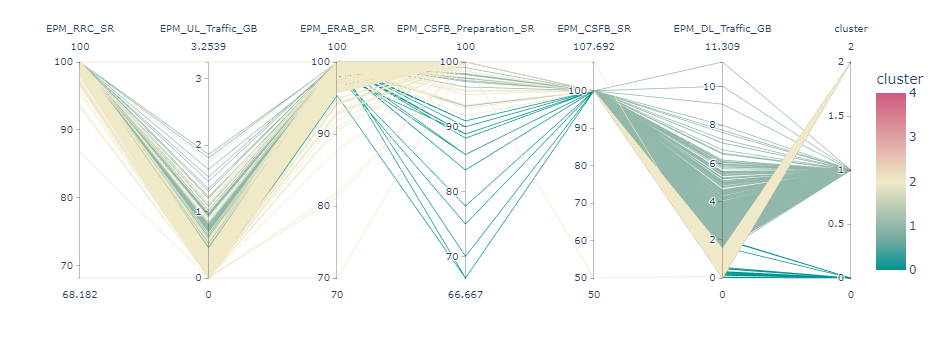

In [59]:
fig = px.parallel_coordinates(X, color="cluster",
                              dimensions=['EPM_RRC_SR', 'EPM_UL_Traffic_GB', 'EPM_ERAB_SR','EPM_CSFB_Preparation_SR','EPM_CSFB_SR',
                                          'EPM_DL_Traffic_GB','cluster'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

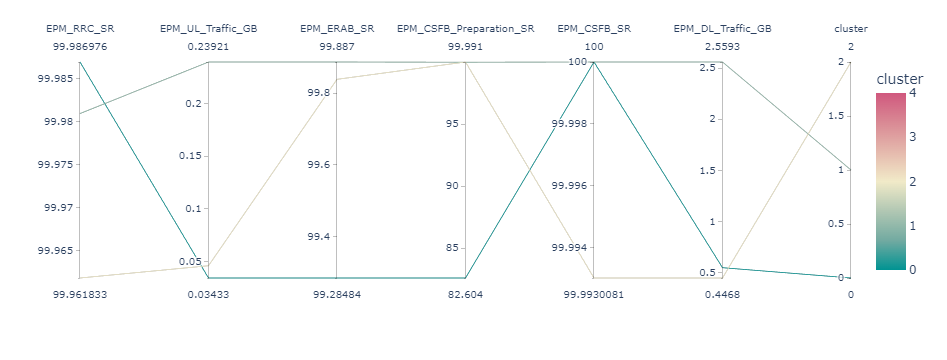

In [60]:
# Create a data frame containing our centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['EPM_RRC_SR', 'EPM_UL_Traffic_GB', 'EPM_ERAB_SR', 'EPM_DL_Traffic_GB',
       'EPM_CSFB_Preparation_SR', 'EPM_CSFB_SR'])
centroids['cluster'] = centroids.index

fig = px.parallel_coordinates(centroids, color="cluster",
                              dimensions=['EPM_RRC_SR', 'EPM_UL_Traffic_GB', 'EPM_ERAB_SR','EPM_CSFB_Preparation_SR','EPM_CSFB_SR',
                                          'EPM_DL_Traffic_GB','cluster'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()